# ImageNet model visualizations

In [19]:
# load data
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

with open("../results/ImageNet_results.json", "r") as f:
    results = json.load(f)

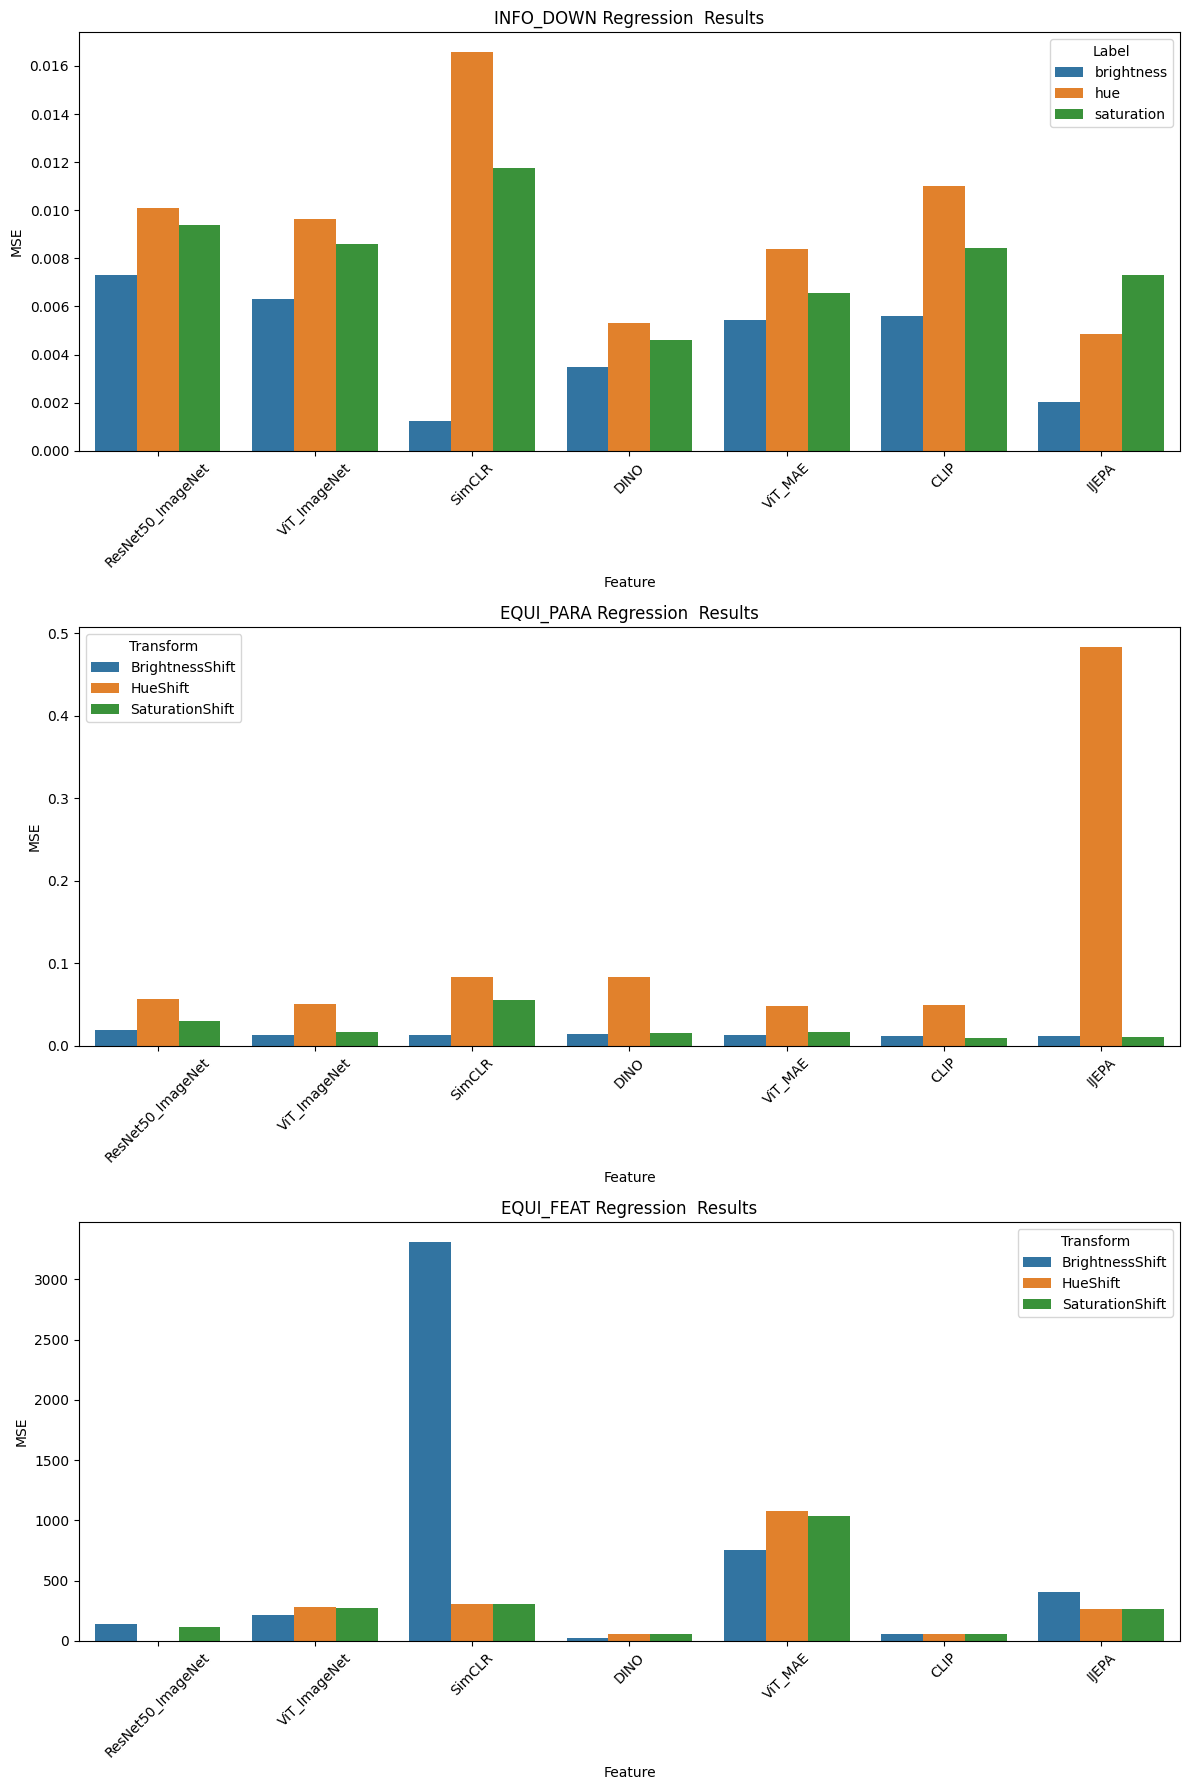

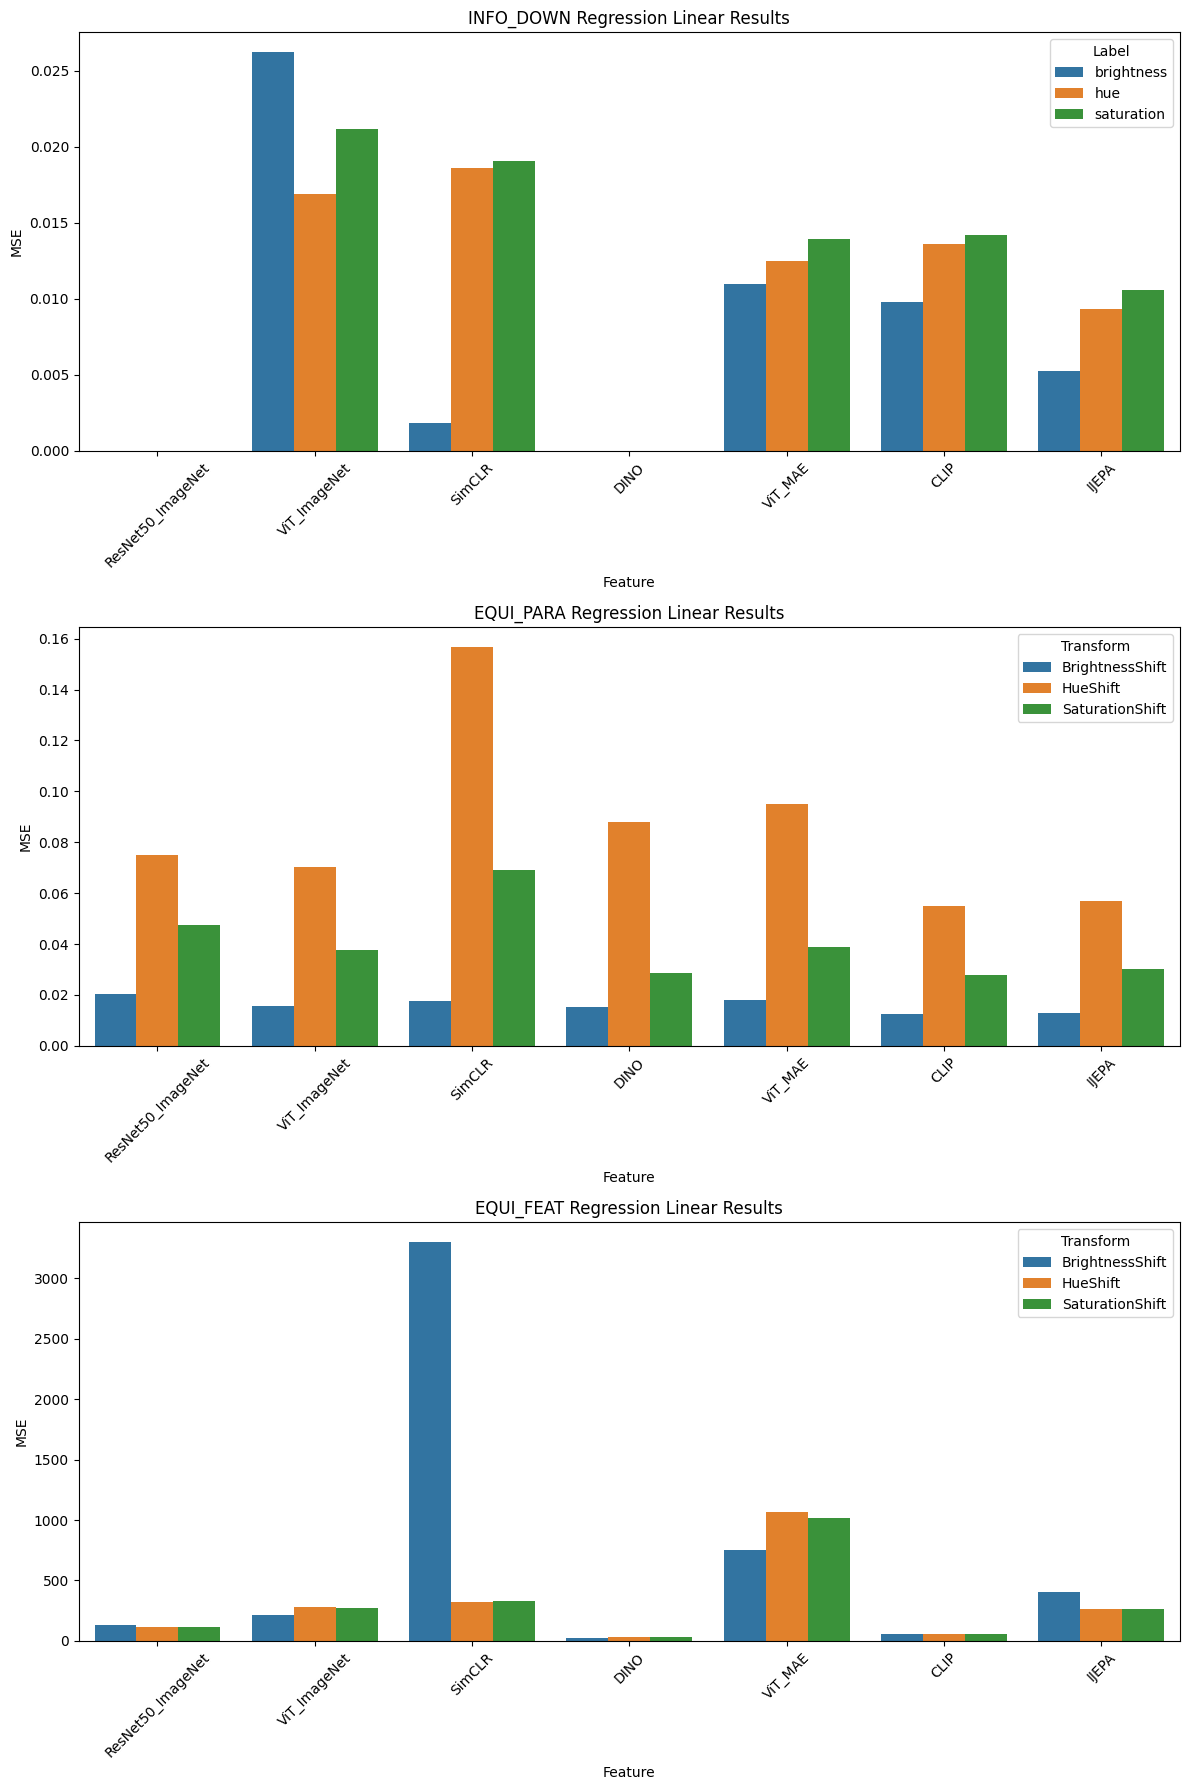

In [22]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define consistent feature order
feature_order = [
    "ResNet50_ImageNet", "ViT_ImageNet", "SimCLR", 
    "DINO", "ViT_MAE", "CLIP", "IJEPA",
]

# Constants for normalization
LABEL_SCALING = {
    'hue': 32400,        # 180^2
    'brightness': 65536,  # 256^2
    'saturation': 65536  # 256^2
}
TRANSFORM_SCALING = {
    'HueShift': 1,
    'BrightnessShift': 16,
    'SaturationShift': 16
}

# Create 2x3 subplot grid
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 18))

# 1. INFO_DOWN Plots
info_data = {'linear': [], 'nonlinear': []}
for run_name, metrics in results.items():
    if "INFO_DOWN_regression_" in run_name:
        feature = next(f for f in feature_order if f in run_name)
        label = next(l for l in ["brightness", "hue", "saturation"] if l in run_name)
        scaled_mse = metrics['MSE'] / LABEL_SCALING[label]
        
        if "linear" in run_name:
            info_data['linear'].append({'Feature': feature, 'Label': label, 'MSE': scaled_mse})
        else:
            info_data['nonlinear'].append({'Feature': feature, 'Label': label, 'MSE': scaled_mse})

df_info_nonlinear = pd.DataFrame(info_data['nonlinear'])
df_info_linear = pd.DataFrame(info_data['linear'])
sns.barplot(data=df_info_nonlinear, x="Feature", y="MSE", hue="Label", ax=ax1, order=feature_order)
sns.barplot(data=df_info_linear, x="Feature", y="MSE", hue="Label", ax=ax2, order=feature_order)
ax1.set_title("INFO_DOWN Regression Results")
ax2.set_title("INFO_DOWN Linear Regression Results")
ax1.tick_params(axis="x", rotation=45)
ax2.tick_params(axis="x", rotation=45)

# 2. EQUI_PARA Plots
para_data = {'linear': [], 'nonlinear': []}
for run_name, metrics in results.items():
    if "EQUI_PARA_regression_" in run_name:
        feature = next(f for f in feature_order if f in run_name)
        transform = next(t for t in ["BrightnessShift", "HueShift", "SaturationShift"] if t in run_name)
        scaled_mse = metrics['mse'] / TRANSFORM_SCALING[transform]
        
        if "linear" in run_name:
            para_data['linear'].append({'Feature': feature, 'Transform': transform, 'MSE': scaled_mse})
        else:
            para_data['nonlinear'].append({'Feature': feature, 'Transform': transform, 'MSE': scaled_mse})

df_para_nonlinear = pd.DataFrame(para_data['nonlinear'])
df_para_linear = pd.DataFrame(para_data['linear'])
sns.barplot(data=df_para_nonlinear, x="Feature", y="MSE", hue="Transform", ax=ax3, order=feature_order)
sns.barplot(data=df_para_linear, x="Feature", y="MSE", hue="Transform", ax=ax4, order=feature_order)
ax3.set_title("EQUI_PARA Regression Results")
ax4.set_title("EQUI_PARA Linear Regression Results")
ax3.tick_params(axis="x", rotation=45)
ax4.tick_params(axis="x", rotation=45)

# 3. EQUI_FEAT Plots
feat_data = {'linear': [], 'nonlinear': []}
for run_name, metrics in results.items():
    if "EQUI_FEAT_regression_" in run_name:
        feature = next(f for f in feature_order if f in run_name)
        transform = next(t for t in ["BrightnessShift", "HueShift", "SaturationShift"] if t in run_name)
        scaled_mse = metrics['avg_l2_distance']
        
        if "linear" in run_name:
            feat_data['linear'].append({'Feature': feature, 'Transform': transform, 'MSE': scaled_mse})
        else:
            feat_data['nonlinear'].append({'Feature': feature, 'Transform': transform, 'MSE': scaled_mse})

df_feat_nonlinear = pd.DataFrame(feat_data['nonlinear'])
df_feat_linear = pd.DataFrame(feat_data['linear'])
sns.barplot(data=df_feat_nonlinear, x="Feature", y="MSE", hue="Transform", ax=ax5, order=feature_order)
sns.barplot(data=df_feat_linear, x="Feature", y="MSE", hue="Transform", ax=ax6, order=feature_order)
ax5.set_title("EQUI_FEAT Regression Results")
ax6.set_title("EQUI_FEAT Linear Regression Results")
ax5.tick_params(axis="x", rotation=45)
ax6.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()